## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 8,6

In [2]:
dataset = pd.read_csv('Movie.csv')

## Exploroing the Dataset

In [3]:
dataset.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
dataset.tail()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
557,Youth in Revolt,Comedy,68,52,18,2009
558,Zack and Miri Make a Porno,Romance,64,70,24,2008
559,Zodiac,Thriller,89,73,65,2007
560,Zombieland,Action,90,87,24,2009
561,Zookeeper,Comedy,14,42,80,2011


In [5]:
len(dataset)

562

In [6]:
dataset.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
len(dataset.columns)

6

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 6 columns):
Film                         562 non-null object
Genre                        562 non-null object
Rotten Tomatoes Ratings %    562 non-null int64
Audience Ratings %           562 non-null int64
Budget (million $)           562 non-null int64
Year of release              562 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.5+ KB


In [9]:
dataset.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,562.000000,562.000000,562.000000,562.000000
mean,47.403915,58.830961,50.104982,2009.145907
std,26.392394,16.827792,48.638482,1.361578
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


## Renaimg the columns

In [10]:
dataset.columns = ['Film','Genre','CriticRatings','AudienceRatings','BudgetMillions','Year']

In [11]:
#Check
dataset.head()

,Film,Genre,CriticRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


## Converting Columns to categories

In [12]:
dataset.Film = dataset.Film.astype('category')
dataset.Genre = dataset.Genre.astype('category')
dataset.Year = dataset.Year.astype('category')

In [13]:
#Check
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 6 columns):
Film               562 non-null category
Genre              562 non-null category
CriticRatings      562 non-null int64
AudienceRatings    562 non-null int64
BudgetMillions     562 non-null int64
Year               562 non-null category
dtypes: category(3), int64(3)
memory usage: 40.4 KB


In [14]:
dataset.describe()

,CriticRatings,AudienceRatings,BudgetMillions
count,562.000000,562.000000,562.000000
mean,47.403915,58.830961,50.104982
std,26.392394,16.827792,48.638482
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


## Jointplots

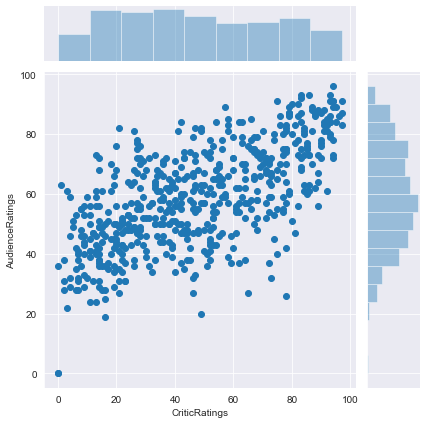

In [15]:
sns.set_style('darkgrid')
plot1 = sns.jointplot(data = dataset, x= 'CriticRatings', y = 'AudienceRatings')

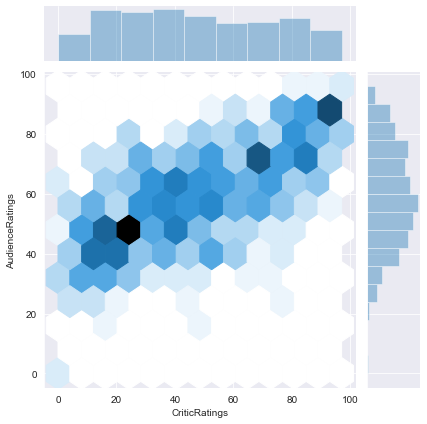

In [16]:
plot1 = sns.jointplot(data = dataset, x= 'CriticRatings', y = 'AudienceRatings', kind = 'hex') 
#Deliverable 1

## Histogram

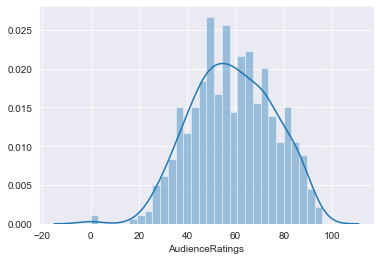

In [17]:
plot2 = sns.distplot(dataset.AudienceRatings, bins = 30)

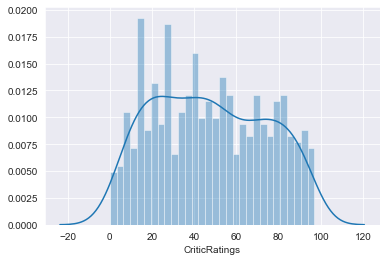

In [18]:
plot3 = sns.distplot(dataset.CriticRatings, bins = 30)

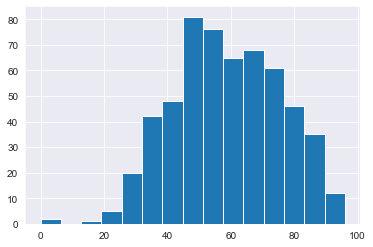

In [19]:
plot4 = plt.hist(dataset.AudienceRatings, bins = 15) 
#Deliverable 2

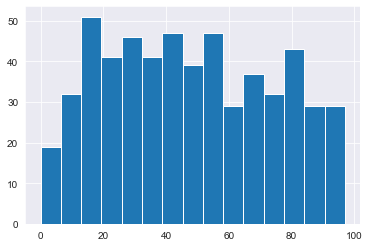

In [20]:
plot5 = plt.hist(dataset.CriticRatings, bins = 15) #Deliverable 3

## Stacked Histogram

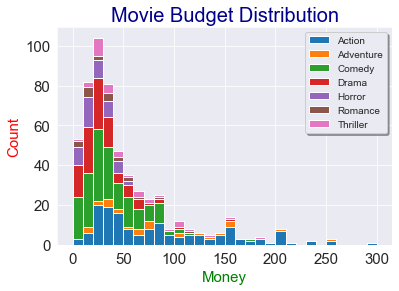

In [21]:
sns.set_style('darkgrid')
list1 = list()
mylabels = list()
for gen in dataset.Genre.cat.categories:
    list1.append(dataset[dataset.Genre == gen].BudgetMillions)
    mylabels.append(gen)

plot6 = plt.hist(list1, bins = 30, stacked = True, rwidth = 4, label = mylabels)
plt.legend(prop={'size':10}, frameon = True, fancybox = True, shadow = True)
plt.title('Movie Budget Distribution', fontsize = 20, color = 'DarkBlue')
plt.xlabel('Money', fontsize = 15, color = 'Green')
plt.ylabel('Count', fontsize = 15, color = 'Red')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show() #Deliverable 4

## KDE Plot

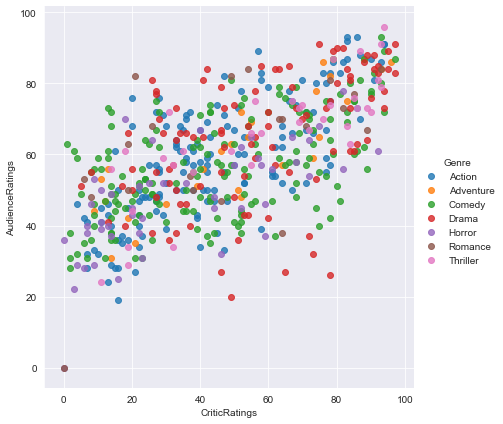

In [22]:
plot7 = sns.lmplot(data = dataset, x = 'CriticRatings', y = 'AudienceRatings', fit_reg = False, hue = 'Genre',
                  size = 6)

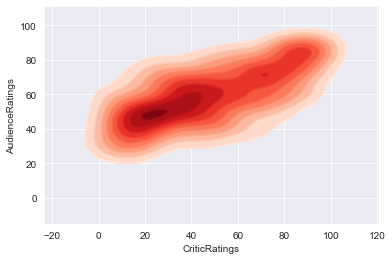

In [23]:
plot8 = sns.kdeplot(dataset.CriticRatings, dataset.AudienceRatings, shade = True, 
                    shade_lowest = False, cmap = 'Reds')
plot8b = sns.kdeplot(dataset.CriticRatings, dataset.AudienceRatings, cmap = 'Reds')

## Subplots

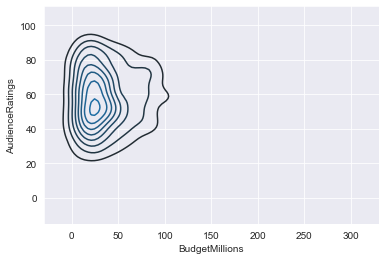

In [24]:
plot9 = sns.kdeplot(dataset.BudgetMillions, dataset.AudienceRatings)

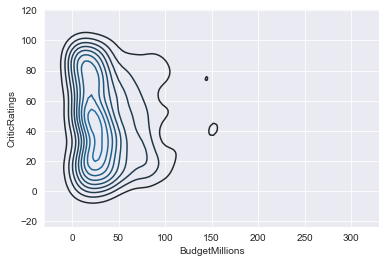

In [25]:
plot10 = sns.kdeplot(dataset.BudgetMillions, dataset.CriticRatings)

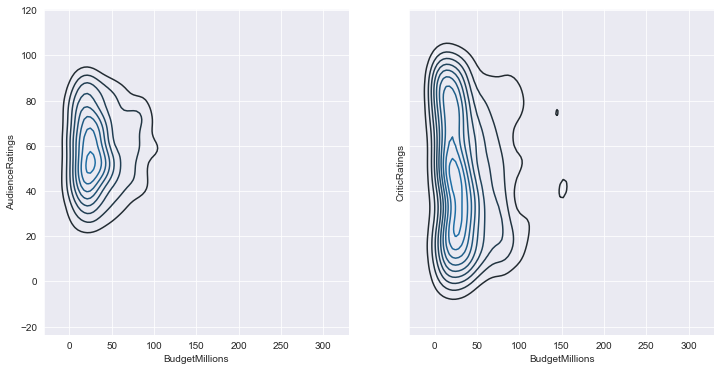

In [26]:
f, axes = plt.subplots(1,2, figsize = (12,6), sharex = True, sharey = True)
plot9 = sns.kdeplot(dataset.BudgetMillions, dataset.AudienceRatings, ax = axes[0])
plot10 = sns.kdeplot(dataset.BudgetMillions, dataset.CriticRatings, ax = axes[1])

## ViolinPlots

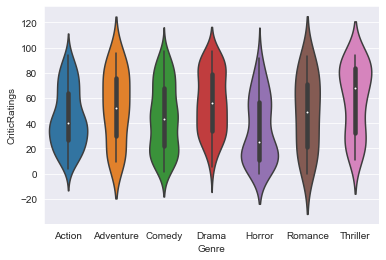

In [27]:
plot11 = sns.violinplot(data = dataset, x = 'Genre', y = 'CriticRatings')

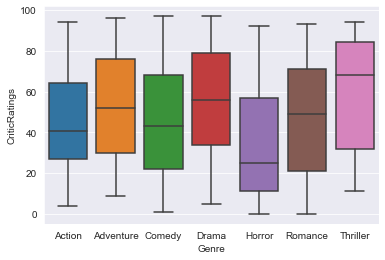

In [28]:
plot12 = sns.boxplot(data = dataset, x = 'Genre', y= 'CriticRatings')

## Facet Grid

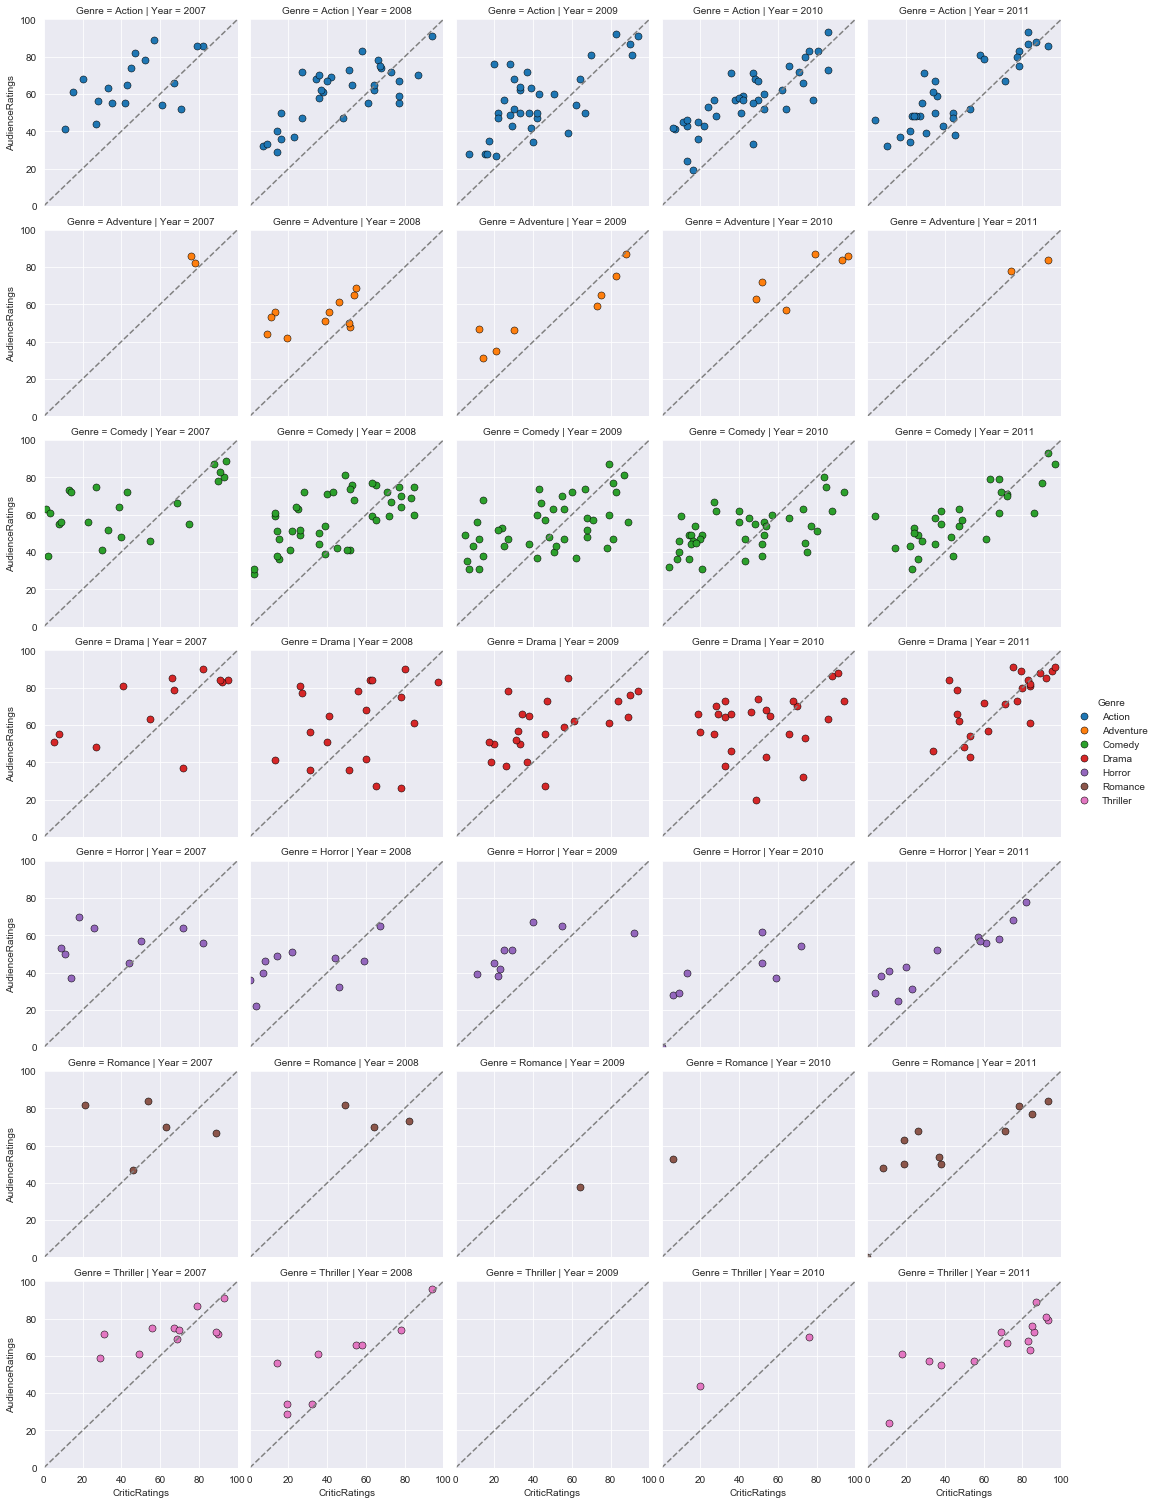

In [29]:
plot13 = sns.FacetGrid(dataset, row = 'Genre', col = 'Year', hue = 'Genre')
kws = dict(s = 50 ,linewidth = 0.5, edgecolor = 'black')
plot13.map(plt.scatter, 'CriticRatings', 'AudienceRatings',**kws)
plot13.set(xlim = (0,100), ylim = (0,100))
for ax in plot13.axes.flat:
    ax.plot((0,100),(0,100), c = 'gray', ls = '--')
plot13.add_legend() # Deliverable 5

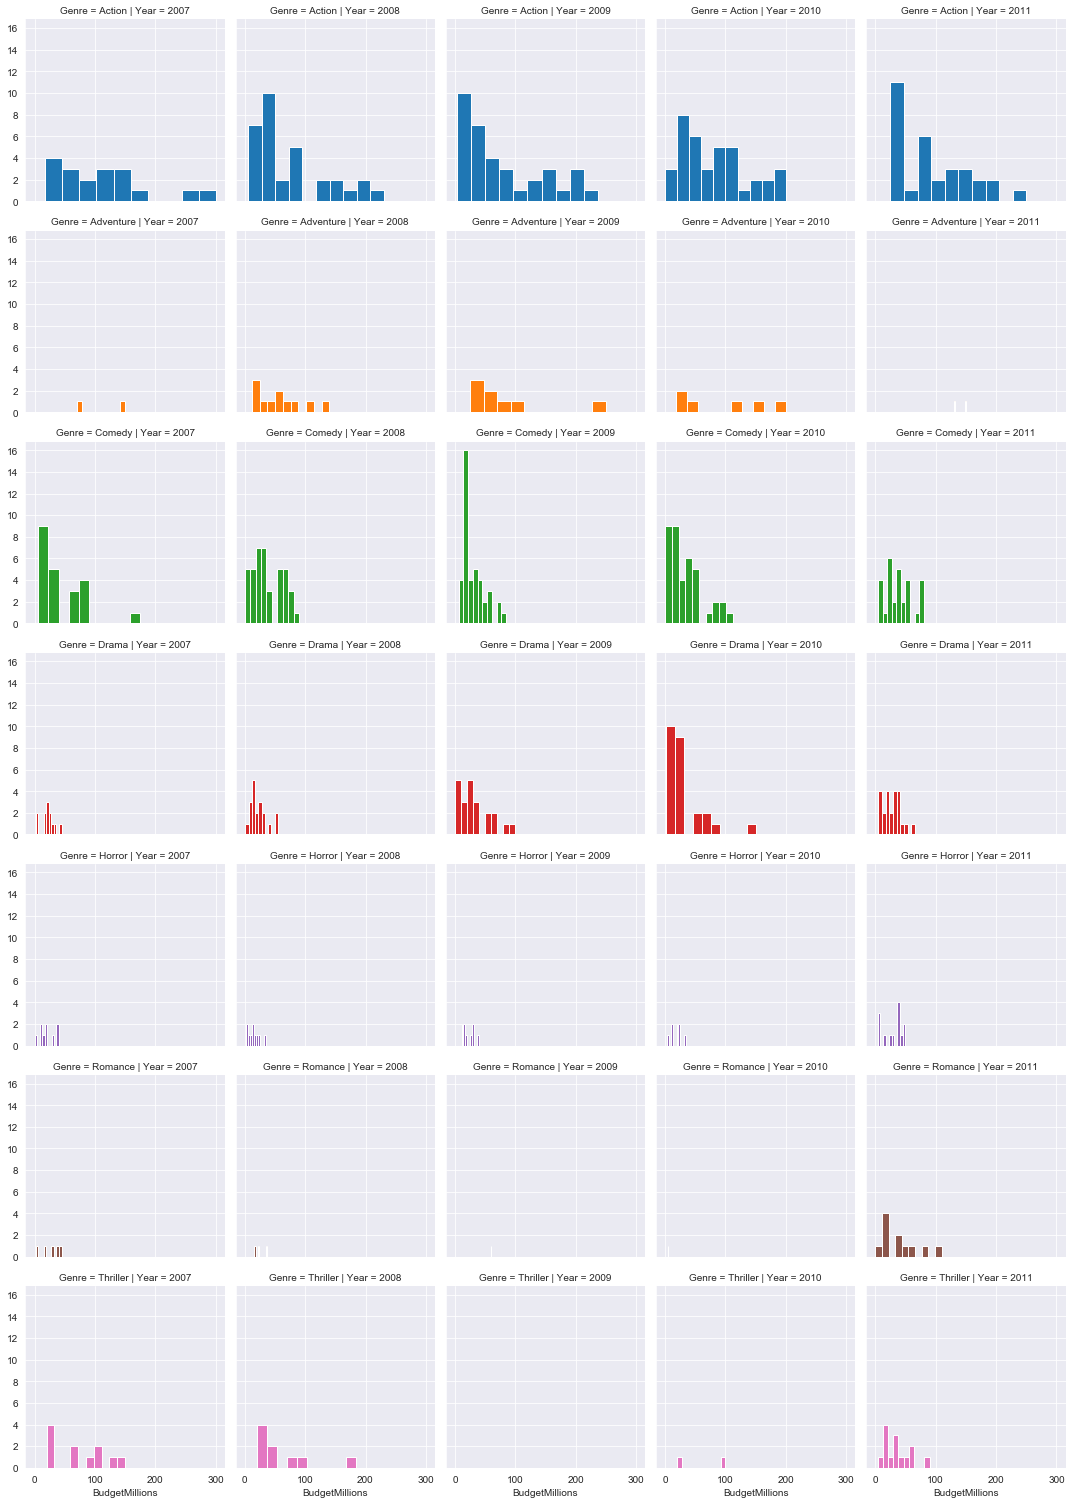

In [30]:
plot14 = sns.FacetGrid(dataset, row = 'Genre', col = 'Year', hue = 'Genre')
plot14.map(plt.hist, 'BudgetMillions')
plt.show()

# Building a Dashboard

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

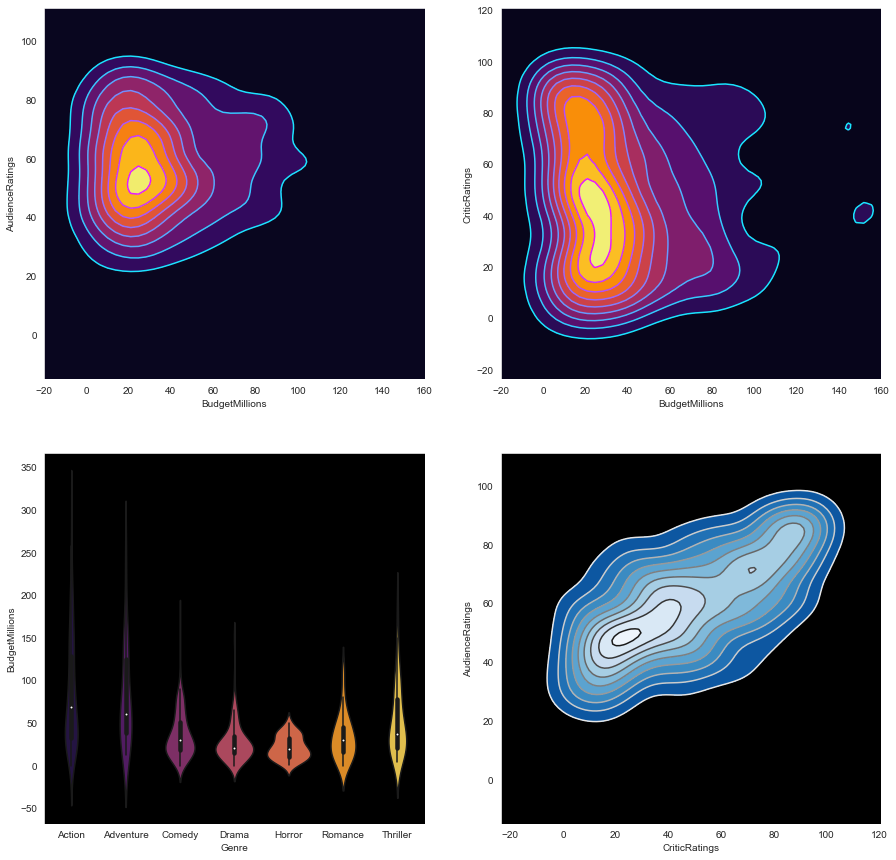

In [32]:
sns.set_style('dark',{'axes.facecolor':'black'})
f, axes = plt.subplots(2,2, figsize = (15,15))
plot9 = sns.kdeplot(dataset.BudgetMillions, dataset.AudienceRatings, shade = True, shade_lowest = True,
                    cmap = 'inferno',ax = axes[0,0])
plot9b = sns.kdeplot(dataset.BudgetMillions, dataset.AudienceRatings,cmap = 'cool',ax = axes[0,0])
plot10 = sns.kdeplot(dataset.BudgetMillions, dataset.CriticRatings, shade = True, shade_lowest = True,
                     cmap = 'inferno', ax = axes[0,1])
plot10b = sns.kdeplot(dataset.BudgetMillions, dataset.CriticRatings,cmap = 'cool', ax = axes[0,1])
plot11 = sns.violinplot(data = dataset, x = 'Genre', y = 'BudgetMillions', palette = 'inferno', ax = axes[1,0])
plot8 = sns.kdeplot(dataset.CriticRatings, dataset.AudienceRatings, shade = True, 
                    shade_lowest = False, cmap = 'Blues_r', ax = axes[1,1])
plot8b = sns.kdeplot(dataset.CriticRatings, dataset.AudienceRatings,cmap = 'gist_gray_r', ax = axes[1,1])
plot9.set(xlim = (-20,160))
plot10.set(xlim = (-20,160))
plt.show()